# Predictive Analytics Individual Project
## Predicting Earthquake Damage

## 1. Problem Description

<p style='text-align: justify;'> In this project we will try to predict the level of damage to buildings that were hit by the earthquake in Nepal which took place in 2015. The variable "damage_grade" shows the damage level indicated by the numbers 1, 2, 3, representing low damage, medium amount of damage, and almost complete destruction respectively. The description of all the features can be found via this link: </p>

[Features](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/)

**This project is available in faculty under the project name: Predictive_Analytics_Individual_Project**

**Notebook name: Predictive_Analytics_Individual.ipynb**

**I have included as Admins the teaching team: Dr Alastair Moore, Kamil Tylinski, and Jiangbo Shangguan**

In [1]:
# Loading the required libraries
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Data modelling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
# Description of damage levels
levels = ["represents low damage","represents medium amount of damage", "represents almost complete destruction"]

damage_levels = pd.DataFrame(levels, index=[1,2,3], columns=['Description'])

damage_levels

,Description
1,represents low damage
2,represents medium amount of damage
3,represents almost complete destruction


## 1.1 Importing Data

In [4]:
# Import data

# Independent Varialbles 
X = pd.read_csv("train_values.csv")

# Output values
y = pd.read_csv("train_labels.csv")

## 1.2 Data Description & Cleaning

In [5]:
# Data types in each df
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


We can see that some columns include object data-types which prevent us from fitting the data to machine learning algorithms. First we will create a separate dataframe with these columns, and convert the categorical values to dummy columns using "get_dummies" from scikitlearn. After that we will join the dummy columns to the original X dataset and drop the columns that initially had the object data-types.

In [7]:
# Selecting the columns with object data types and showing their distinct values
object_df = X.select_dtypes(include=object)

for col in object_df.columns:
    print(object_df[[col]].value_counts())

land_surface_condition
t                         216757
n                          35528
o                           8316
dtype: int64
foundation_type
r                  219196
w                   15118
u                   14260
i                   10579
h                    1448
dtype: int64
roof_type
n            182842
q             61576
x             16183
dtype: int64
ground_floor_type
f                    209619
x                     24877
v                     24593
z                      1004
m                       508
dtype: int64
other_floor_type
q                   165282
x                    43448
j                    39843
s                    12028
dtype: int64
position
s           202090
t            42896
j            13282
o             2333
dtype: int64
plan_configuration
d                     250072
q                       5692
u                       3649
s                        346
c                        325
a                        252
o                      

In [8]:
# Show the df with the categorical values
object_df.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


In [9]:
# Replacing categorical values with dummy columns
object_df = pd.get_dummies(object_df)
object_df.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Joining the dummy dataframe with the original X dataframe
final_X = pd.concat([X, object_df], axis=1, join="inner")
final_X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Dropping all the object data-type columns
for (columnName, columnData) in final_X.iteritems():
    if columnData.dtypes==object:
        final_X = final_X.drop(columns=[columnName])

final_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 69 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   has_superstructure_adobe_mud            260601 non-null  int64
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64
 10  has_superstructure_stone_flag           260601 non-null  int64
 11  

In [12]:
# final_X dimensions
final_X.shape

(260601, 69)

In [13]:
# y data dimensions
y.shape

(260601, 2)

<p style='text-align: justify;'> Initially, we had 260,601 instances to work with, and 39 features. Now, including the new dummy columns the dataset consists of 69 features. The output dataset has two columns, one for building_id, and damage_grade. Below, we can see the first 10 rows of each dataset. </p>

In [14]:
final_X.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0
5,333020,8,558,6089,2,10,9,5,0,1,...,0,0,0,0,0,0,0,0,1,0
6,728451,9,475,12066,2,25,3,4,0,1,...,0,0,0,0,0,0,0,0,1,0
7,475515,20,323,12236,2,0,8,6,0,0,...,0,0,0,0,0,1,0,0,1,0
8,441126,0,757,7219,2,15,8,6,0,1,...,0,0,0,0,0,0,0,0,1,0
9,989500,26,886,994,1,0,13,4,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
y.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


<p style='text-align: justify;'>The damage levels are shown below along with the number of instances for each level. First the exact numbers of instances for each level and then visualising the same instances with a barplot. </p>

In [16]:
damage_level_counts = y.groupby('damage_grade').size()
damage_level_counts.sort_values(ascending=False)

damage_grade
2    148259
3     87218
1     25124
dtype: int64

<AxesSubplot:title={'center':'Number of Instances for Each Damage Level'}>

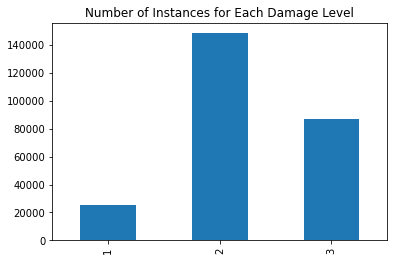

In [17]:
(y.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Instances for Each Damage Level"))


<p style='text-align: justify;'> We can see that the majority of the instances are level 2 (148,259), followed by level 3 (87218) and level 1 (25124), showing that the classes are not balanced. This shows that we will not have an equal amount of observations to train the algorithm for each damage level. At a later stage, this might prevent us from achieving optimal performance with our models. </p>

In [18]:
# Checking for missing values
X.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [19]:
y.isna().sum()

building_id     0
damage_grade    0
dtype: int64

Additionally, we can see that there are no missing values and thus no inconsistencies in our data. We can move on with data visualization.  

We plot the variables **foundation_type, area_percentage,height_percentage, count_floors_pre_eq, land_surface_condition, has_superstructure_cement_mortar_stone** with **damage_grade** presented in three different colours for each level. We can see that most of the tall houses got a damage of level 3. Apart from that, it is observed that houses suffered very different damage levels and it is difficult to spot any patters.

In [20]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = X[selected_features].join(y)

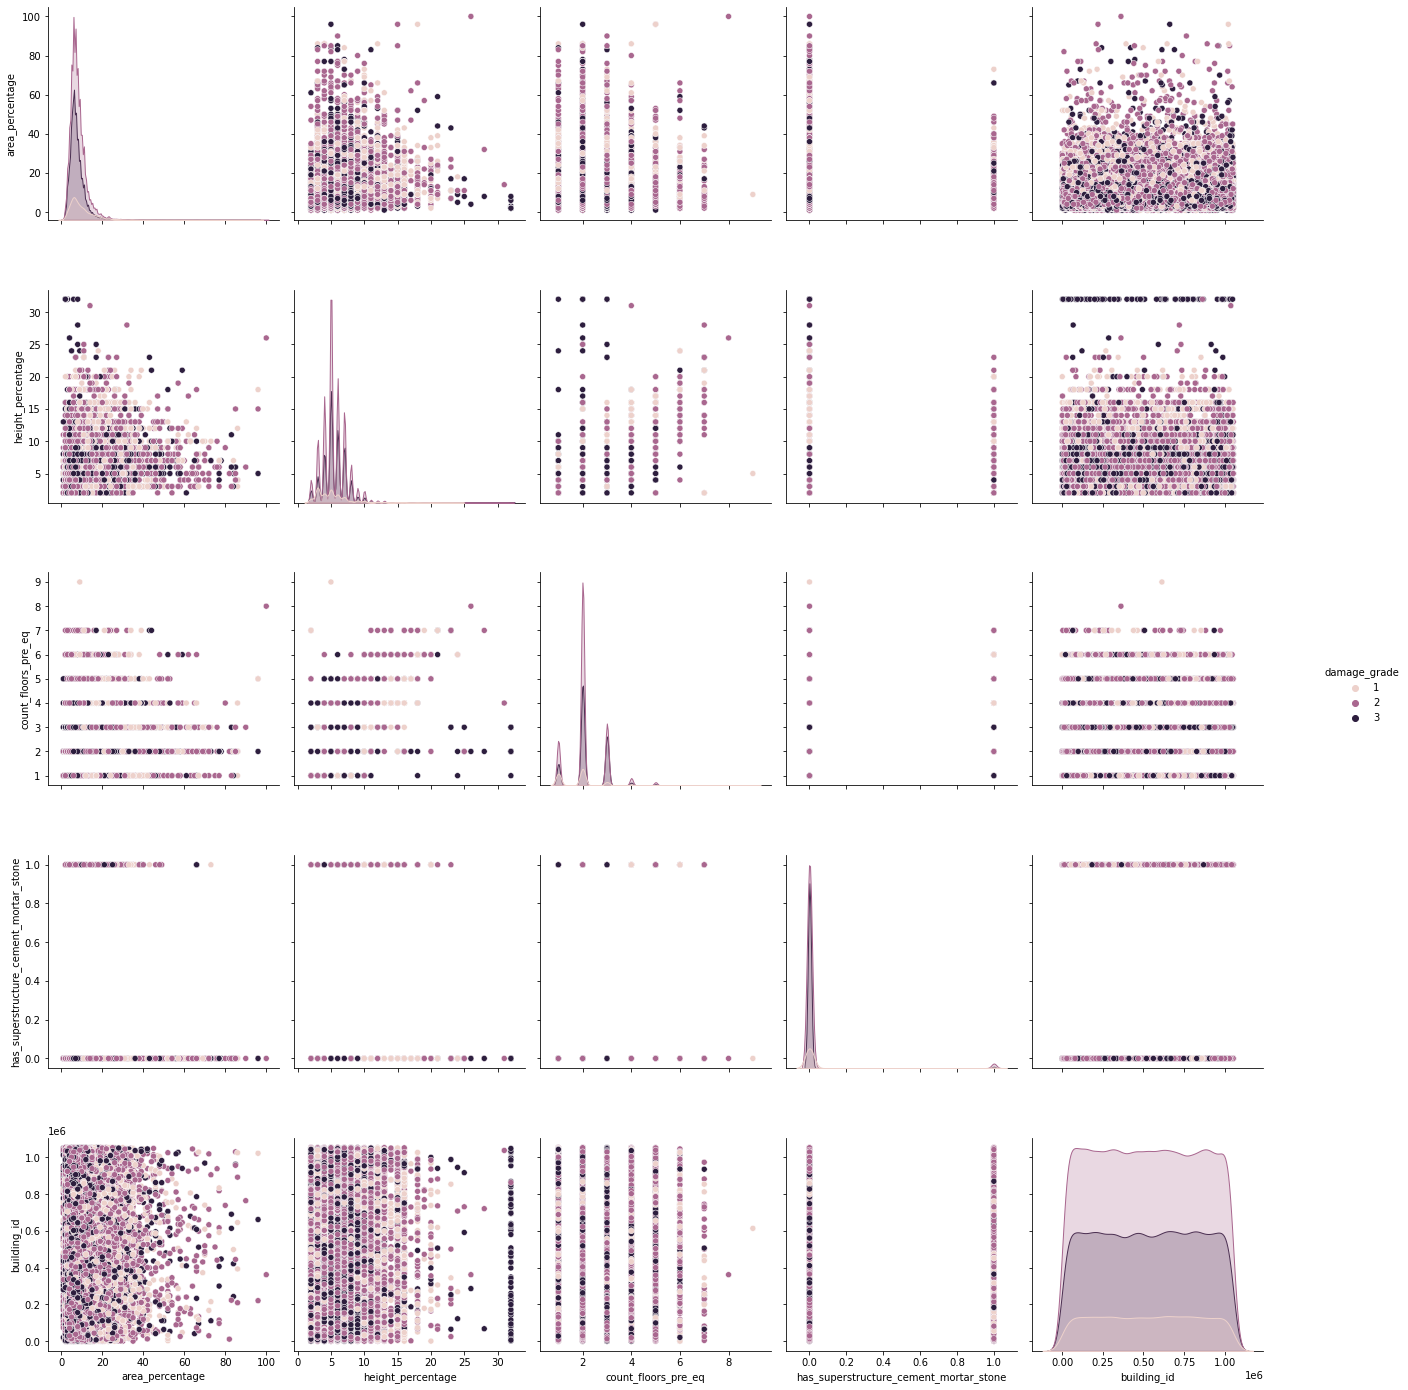

In [85]:
g = sns.pairplot(train_values_subset, 
             hue='damage_grade')
g.fig.set_size_inches(20,20)

Below we plot a correlation heatmap of the variables in train_set_subset. As expected, there is some correlation in higher damage grade for taller buildings. 

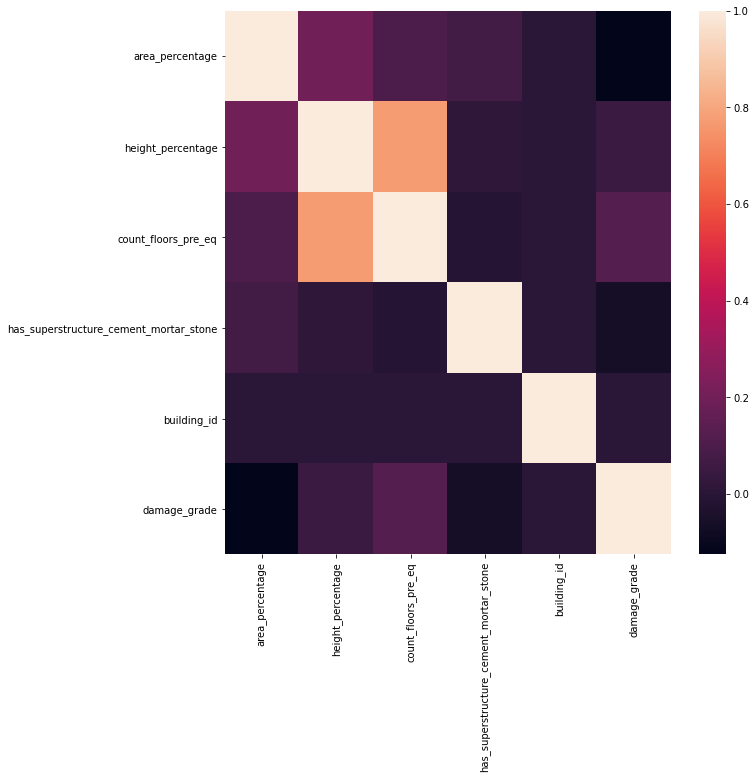

In [86]:
heatmap = sns.heatmap(train_values_subset.corr());
heatmap.figure.set_size_inches(10,10)

## 2. Data Preparation

In the following steps we will standardise the training dataset. Since **building_id** will not assist in the prediction of the damage_grade, it will not be standardised and will be dropped from the train and test sets.

In [23]:
# standardising dataset
df_std = final_X.copy()

In [24]:
scaler = StandardScaler()
df_std.iloc[:,1:] = scaler.fit_transform(df_std.iloc[:,1:])

In [25]:
df_std.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
1,28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
2,94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
3,590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
4,201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878


Now, we will split the data to train (X_train, y_train) and test sets (X_test, y_test). We will use 80% of the data for training and the rest 20% for testing.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.8, random_state=42)

Dropping **building_id**

In [27]:
X_train = X_train.drop(columns='building_id')
X_test = X_test.drop(columns='building_id')

In [28]:
y_train = y_train.drop(columns='building_id')
y_test = y_test.drop(columns='building_id')

In [29]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
180660,-1.481322,0.118546,0.925614,-0.178274,-0.292732,0.678916,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
124124,0.385835,0.736414,-1.201986,-0.178274,0.183033,-0.004110,-0.747683,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
168336,-0.858937,0.569226,-0.540505,-0.178274,-0.292732,-0.914810,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
118913,-0.858937,-1.689018,0.314868,1.195989,-0.156799,-0.459460,0.294845,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
136722,1.506130,1.044136,-0.188647,-0.178274,-0.156799,-0.687135,-0.747683,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878


In [30]:
X_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
111801,-0.485505,1.267053,1.335611,-1.552536,-0.088832,-0.231785,-1.268946,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
91817,1.008221,0.969023,1.707215,-0.178274,0.454899,-0.231785,0.294845,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
251661,1.506130,-1.604213,1.421176,-0.178274,0.318966,-0.459460,-0.226419,-0.311877,-1.789003,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
205479,-0.734459,0.901178,-0.963940,1.195989,0.318966,-0.231785,0.294845,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
22618,-0.983414,0.011934,0.466526,-0.178274,-0.156799,-0.004110,-0.747683,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878


## 3. Algorithm Evaluation

<p style='text-align: justify;'>Various algorithms will be tested and the F1-score will be used to compare their performance. F1-score is a balanced mean between accuracy and recall, suitable when the number of observations for the classes are unbalanced. This is because we want to avoid selecting models that predict the most frequent classes. It ranges from 0 to 1 with higher values denoting better performance. We will use the micro-average method as our damage classes are imbalanced.<p/>

<p style='text-align: justify;'>We will compare the following algorithms: Random Forests, Extra Trees, Gradient Boosting, Support Vector Machines, Linear Support Vector Machines, and Gaussian RBF Kernel. At the end we will combine these algorithms with a Voting Classifier. Each model will be trained with the train set (X_train and y_train) and then used for predicting the test set (X_test).</p>

## 3.1 Random Forests

<p style='text-align: justify;'>The Random Forests Classifier belongs to the ensemble methods and it is thought to be a good start for classification problems. The algorithm searches for the best feature among a random subset of features for each node Geron(2019, p.197). We will iterate through a dictionary where the keys represent number of max leaf nodes and values represent number of trees</p>

In [51]:
# Keys represent number of max leaf nodes and values represent number of trees
parameters = {50:100, 200:300, 400:500 , 600:700, 2000:2000}
for node,estim in parameters.items():
    rnd_clf = RandomForestClassifier(n_estimators=estim, max_leaf_nodes=node, n_jobs=-1)
    
    # Fiting training set and making predictions using the test set
    rnd_clf.fit(X_train,np.ravel(y_train))
    y_pred_rf = rnd_clf.predict(X_test)
    
    #Calculate the f1_score
    print("Number of estimators: " + str(estim) + 
          ", max_leaf_nodes: " + str(node) +
          ", F1_score: " + str(f1_score(y_test,y_pred_rf,average='micro')))

Number of estimators: 100, max_leaf_nodes: 50, F1_score: 0.6331656122140626
Number of estimators: 300, max_leaf_nodes: 200, F1_score: 0.6534744173329944
Number of estimators: 500, max_leaf_nodes: 400, F1_score: 0.6646600889289671
Number of estimators: 700, max_leaf_nodes: 600, F1_score: 0.6706894153424053
Number of estimators: 2000, max_leaf_nodes: 2000, F1_score: 0.6868155851132717


We observe that as the number of trees and nodes increases, the model achieves a higher F1 score.

## 3.2 Extra Trees Classifier

<p style='text-align: justify;'>Following is the Extra Trees Classifier where a random threshold is used for each feature. Meaning that we are adding additional randomness to our model. This time we will iterate through a list where its values represent the number of estimators.<p/>

In [54]:
estimators = [100, 300, 500 , 700, 1000]
for estim in estimators:
    extr_tr = ExtraTreesClassifier(n_estimators=estim, n_jobs=-1)
    
    # Fiting training set and making predictions using the test set
    extr_tr.fit(X_train,np.ravel(y_train))
    y_pred_extr = extr_tr.predict(X_test)
    
    #Calculate the f1_score
    print("Number of estimators: " + str(estim) + 
          ", F1_score: " + str(f1_score(y_test,y_pred_extr,average='micro')))

Number of estimators: 100, F1_score: 0.6701282131225388
Number of estimators: 300, F1_score: 0.6729630038228903
Number of estimators: 500, F1_score: 0.672349039001156
Number of estimators: 700, F1_score: 0.672684801013042
Number of estimators: 1000, F1_score: 0.6730397494256072


<p style='text-align: justify;'>The Extra Trees Classifier has no meaninful change of performance while we increase the number of estimators. Moreover, it performs slightly worse than Random Forest.</p>

## 3.2 Gradient Boosting

<p style='text-align: justify;'>Another ensemble method is Gradient Boosting. In this case we are sequencially combining 1000 estimators. This combination attempts to fit the new estimator to the residual errors of the previous estimator.</p>

In [65]:
parameters = [0.01, 0.1, 0.2, 0.5, 1.0]

for learn in parameters:
    gr_boost = GradientBoostingClassifier(learning_rate=learn, max_depth=2)
    
    # Fiting training set and making predictions using the test set
    gr_boost.fit(X_train,np.ravel(y_train))
    y_pred_boost = gr_boost.predict(X_test)
    
    #Calculate the f1_score
    print("Learning Rate: " + str(learn) +
          ", F1_score: " + str(f1_score(y_test,y_pred_extr,average='micro')))

Learning Rate: 0.01, F1_score: 0.6730397494256072
Learning Rate: 0.1, F1_score: 0.6730397494256072
Learning Rate: 0.2, F1_score: 0.6730397494256072
Learning Rate: 0.5, F1_score: 0.6730397494256072
Learning Rate: 1.0, F1_score: 0.6730397494256072


Gradient Boosting achieves a similar F1 score of around 0.67, similar with the Extra Trees Classifier. Moreover, the F1 score stays the same over the different learning rates applied to the model.

## 3.3 Linear Support Vector Machines 

<p style='text-align: justify;'>After that, we will try to predict damage_grade with a Linear Support Vector Machine (SVM) model. This model will try to separate the data drawing a straight line that is furthest from each class. Unfortunately our data is not linearly separable since there are a lot of similar houses that were damaged in different ways. Therefore this model should not perform well on our data.<p/>

In [71]:
cvm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [72]:
cvm_clf.fit(X_train,np.ravel(y_train))
y_pred_cvm = cvm_clf.predict(X_test)
print("F1_score: " + str(f1_score(y_test,y_pred_cvm, average='micro')))


F1_score: 0.5735870415049813


/Users/ektornikolinakos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<p style='text-align: justify;'>As expected the model performed considerably worse than the previous classifiers, with F1 score around 0.5738. The error explaining that the model "failed to converge" confirms that our data is not linearly separable.</p>

## 3.4 Gaussian RBF Kernel

<p style='text-align: justify;'>Since our data is not linearly separable, we will test if the Gaussian Radial Basis Function (RBF) Kernel can perform better from the Linear SVM. This model is capable of separating non-linear separable data because it performs the kernel trick. Meaning that it achieves similar results with polynomial models but without actually adding polynomial features to the model.</p>

In [73]:
rbf_kernel = Pipeline ([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])

In [74]:
# Fiting training set and making predictions using the test set
rbf_kernel.fit(X_train, np.ravel(y_train))
y_pred_rbf = rbf_kernel.predict(X_test)

In [76]:
#Calculate the f1_score
print("F1_score: " + str(f1_score(y_test,y_pred_rbf, average='micro')))

F1_score: 0.5687856447350118


Unfortunately, it has very similar performance to the Linear SVM, resulting in F1_score = 0.5687

## 3.4 Voting Classifier

<p style='text-align: justify;'>Lastly, we will test the performance of the Voting Classifier where the different models are combined to get a better prediction performance. In this case Random Forests, Extra Trees, and Gradient Boost will be used.</p>

In [78]:
from sklearn.ensemble import VotingClassifier

In [79]:
voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('extr_tr', extr_tr), ('gr_boost', gr_boost)],
    voting='hard')

In [81]:
voting_clf.fit(X_train,np.ravel(y_train))

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_leaf_nodes=2000,
                                                     n_estimators=2000,
                                                     n_jobs=-1)),
                             ('extr_tr',
                              ExtraTreesClassifier(n_estimators=1000,
                                                   n_jobs=-1)),
                             ('gr_boost',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=2))])

In [84]:
# Fiting training set and making predictions using the test set for each model
for clf in (rnd_clf, extr_tr, gr_boost, voting_clf):
    clf.fit(X_train, np.ravel(y_train))
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ +
          ", F1_score: " + str(f1_score(y_test,y_pred, average='micro')))

RandomForestClassifier, F1_score: 0.6868011953127623
ExtraTreesClassifier, F1_score: 0.6730397494256072
GradientBoostingClassifier, F1_score: 0.7031336188909301
VotingClassifier, F1_score: 0.7012629448247083


<p style='text-align: justify;'>Lastly, we achieved the highest F1 scores of around 0.70 by using the Gradient Boosting Classifier with learning rate = 1.0 and max tree depth = 2. The Voting Classifier produced similar results. Additionally, we observe that Random Forests and Extra Trees achieved better results from our previoud runs. This shows that the we could further tune the hyperparameters of the models to improve our results.</p>

## 4. Conclusion

<p style='text-align: justify;'>Machine learning has proved to be useful in solving various problems in our society and this project is no exception to that. We showed how with various out-of-the-box models and minor tuning, produced acceptable results in such a complex problem. However, time and computing power limitations proved to be a bottleneck in achieving better results. With more computing power we could spend time in applying more complex models and tuning the hyperparameters further. Furthermore, because of the complex nature of predicting building damage from an earthquake, more training data prove to be useful. The results from our model predictions could be used to further understand the risks in building houses with certain material and foundation structures. Most importantly, it could be used to reduce causalties and the risk of property loss during earthquakes in seismic zones.</p>

## References


**1. Driven Data (2020)** "Richter's Predictor: Modeling Earthquake Damage" Available at: https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

**2. Rush Dishams (2011)** "Micro- and Macro-average of Precision, Recall and F-Score" Available at: https://rushdishams.blogspot.com/2011/08/micro-and-macro-average-of-precision.html

**3. Aurelien Geron (2019)** "Hands-on Mahchine Learning with Scikit-Learn, Keras & Tensorflow", Chapters: 3, 5, 6, 7

**4. Scikit Learn (2022)** "Random Forest Classifier", Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**5. Scikit Learn (2022)** "Extra Trees Classifier", Availabe at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

**6. Scikit Learn (2022)** "Gradient Boosting Classifier", Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

**7. Scikit Learn (2022)** "Linear SVC", Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

**8. Scikit Learn (2022)** "gaussian_process.kernels.RBF", Available at: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

**9. Kevin Arvai (2018)** "Fine tuning a classifier in scikit-learn", Available at: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
